In [1]:
import numpy as np
import torch
import time
import MNISTtools

In [2]:
# 1
x = torch.Tensor(5, 3)
print(x)
print(x.type())

tensor([[-2.7837e+29,  3.0896e-41,  5.7453e-44],
        [ 0.0000e+00,         nan,  1.8040e+28],
        [ 1.3733e-14,  6.4076e+07,  2.0706e-19],
        [ 7.3909e+22,  2.4176e-12,  1.1625e+33],
        [ 8.9605e-01,  1.1632e+33,  5.6003e-02]])
torch.FloatTensor


x is un-initialized. The type is torch.FloatTensor

In [3]:
# 2
y = torch.rand(5, 3)
print(y)
print(y.type())
y1 = torch.randn(5, 3)
print(y1)
print(y1.type())

tensor([[0.9321, 0.7039, 0.8556],
        [0.0264, 0.7157, 0.0408],
        [0.9612, 0.1300, 0.8118],
        [0.8288, 0.4323, 0.7953],
        [0.9419, 0.7005, 0.4174]])
torch.FloatTensor
tensor([[ 1.1127e-02, -1.4869e-03, -1.1222e+00],
        [ 5.1983e-01, -6.0920e-01,  1.5668e+00],
        [ 3.9945e-01,  5.2170e-01,  3.9980e-01],
        [ 3.9619e-02,  1.0847e+00,  8.5472e-01],
        [ 6.3198e-01, -1.5964e+00, -1.5371e+00]])
torch.FloatTensor


For rand, the random values is uniform distributed. The type of this y is torch.FloatTensor;
For randn, the random values is normal distributed (SD=1, mean=0). The type of this y is torch.FloatTensor.

In [4]:
# 3
x = x.double()
y = y.double()
print(x)
print(y)

tensor([[-2.7837e+29,  3.0896e-41,  5.7453e-44],
        [ 0.0000e+00,         nan,  1.8040e+28],
        [ 1.3733e-14,  6.4076e+07,  2.0706e-19],
        [ 7.3909e+22,  2.4176e-12,  1.1625e+33],
        [ 8.9605e-01,  1.1632e+33,  5.6003e-02]], dtype=torch.float64)
tensor([[0.9321, 0.7039, 0.8556],
        [0.0264, 0.7157, 0.0408],
        [0.9612, 0.1300, 0.8118],
        [0.8288, 0.4323, 0.7953],
        [0.9419, 0.7005, 0.4174]], dtype=torch.float64)


The type is torch.float64

In [2]:
# 4
x = torch.Tensor([[-0.1859, 1.3970, 0.5236],
[ 2.3854, 0.0707, 2.1970],
[-0.3587, 1.2359, 1.8951],
[-0.1189, -0.1376, 0.4647],
[-1.8968, 2.0164, 0.1092]])
y = torch.Tensor([[ 0.4838, 0.5822, 0.2755],
[ 1.0982, 0.4932, -0.6680],
[ 0.7915, 0.6580, -0.5819],
[ 0.3825, -1.1822, 1.5217],
[ 0.6042, -0.2280, 1.3210]])

Their shapes are (5,3)

In [3]:
# 5
z = torch.stack((x, y))
print(z.shape)

z1 = torch.cat((x, y), 0)
print(z1.shape)

z2 = torch.cat((x, y), 1)
print(z2.shape)

torch.Size([2, 5, 3])
torch.Size([10, 3])
torch.Size([5, 6])


When using stack, the shape is (2,5,3)

When using cat((x, y), 0), the shape is (10,3)

When using cat((x, y), 1), the shape is (5,6)

In [5]:
# 6
print('y(5,3) = ', y[4,2])
print('z(1, 5,3) = ', z[1,4,2])

y(5,3) =  tensor(1.3210)
z(1, 5,3) =  tensor(1.3210)


In [13]:
# 7
print('z(:, 5,3) = ', z[:, 4,2])

z(:, 5,3) =  tensor([0.1092, 1.3210])


There are 2 elements.

In [15]:
# 8
print(x + y)
print(torch.add(x, y))
print(x.add(y))
torch.add(x, y, out=x)
print(x)

tensor([[ 0.2979,  1.9792,  0.7991],
        [ 3.4836,  0.5639,  1.5290],
        [ 0.4328,  1.8939,  1.3132],
        [ 0.2636, -1.3198,  1.9864],
        [-1.2926,  1.7884,  1.4302]])
tensor([[ 0.2979,  1.9792,  0.7991],
        [ 3.4836,  0.5639,  1.5290],
        [ 0.4328,  1.8939,  1.3132],
        [ 0.2636, -1.3198,  1.9864],
        [-1.2926,  1.7884,  1.4302]])
tensor([[ 0.2979,  1.9792,  0.7991],
        [ 3.4836,  0.5639,  1.5290],
        [ 0.4328,  1.8939,  1.3132],
        [ 0.2636, -1.3198,  1.9864],
        [-1.2926,  1.7884,  1.4302]])
tensor([[ 0.2979,  1.9792,  0.7991],
        [ 3.4836,  0.5639,  1.5290],
        [ 0.4328,  1.8939,  1.3132],
        [ 0.2636, -1.3198,  1.9864],
        [-1.2926,  1.7884,  1.4302]])


They are equivalent.

In [16]:
# 9
x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 8)
print(x.size(), y.size(), z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


torch.randn(4,4) generates a (4, 4) torch.tensor via sampling from uniform distribution

x.view(16) flattens the (4, 4) tensor to an one dimension array.

x.view(-1, 8) reshape the original tensor to an (2, 8) tensor; -1 means that the value is inferred from the length of the array and remaining dimensions.

In [21]:
# 10
x = torch.rand(10, 10)
y = torch.rand(2, 100)
x = x.view(1, 100)
y = y.view(-1, 2)
result = torch.mm(x, y)
print(result)

tensor([[22.1700, 24.2236]])


In [26]:
# 11
a = torch.ones(5)
print(a)
b = a.numpy()
print(b)
print(type(a))
print(type(b))

tensor([1., 1., 1., 1., 1.])
[1. 1. 1. 1. 1.]
<class 'torch.Tensor'>
<class 'numpy.ndarray'>


The type of a is one dimension (5, ) torch.Tensor.

The type of b is one dimension (5, ) numpy.array.

In [24]:
# 12
a[0] += 1
print(a)
print(b)

tensor([2., 1., 1., 1., 1.])
[2. 1. 1. 1. 1.]


They are match and they underlying share memory locations.

In [28]:
# 13
a = torch.ones(5)
b = a.numpy()
a.add_(1)
print(a)
print(b)

a = torch.ones(5)
b = a.numpy()
a[:] += 1
print(a)
print(b)

a = torch.ones(5)
b = a.numpy()
a = a.add(1)
print(a)
print(b)

tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.])
[1. 1. 1. 1. 1.]


Similarities: all of the three methods add 1 to all the elements in a.

Differences: the first two methods generate matched a and b, which indicates that they a and b are still sharing the same memory location.
                  The last methods only influence a but not b.

In [29]:
# 14
a = np.ones(5)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b)

[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


In [32]:
# 15   
device = 'cuda' if torch.cuda.is_available() else 'cpu'   # let device be 'cuda' only when torch.cuda.is_available() is True; otherwise let device be 'cpu'
print(device)
s1 = time.time()                   # record the start time 1
x = torch.randn(5, 3).to(device)         # generate a (5, 3) tensor and then moved onto GPU
e1 = time.time()                   # record the end time 1
s2 = time.time()                   # record the start time 2
y = torch.randn(5, 3, device=device)   # generate a (5, 3) tensor on GPU
e2 = time.time()                   # record the end time 2
z = x + y                             # make an addition
print('First allocation:', e1 - s1)
print('Second allocation:', e2 - s2)

cuda
First allocation: 0.0008475780487060547
Second allocation: 0.00024437904357910156


The interpretation is in the code comment

The second one is the most efficient since it directly generate tensor on GPU.

In [33]:
# 16
print(z.cpu().numpy())   # first transfer z from GPU to CPU and then convert to numpy array
print(z.numpy())           # directly convert z(on GPU) to numpy array(on CPU)   It would post an error!

[[-2.179279   -0.40430903  0.3379439 ]
 [-1.0426476   1.168484   -0.32202417]
 [-0.5972038   0.72707856  0.87745774]
 [-1.2117367   1.8122796  -0.3585984 ]
 [-1.9936645   0.7345663   1.3936126 ]]


TypeError: can't convert CUDA tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

First, transfer z from GPU to CPU and then convert to numpy array.

Directly converting z(on GPU) to numpy array(on CPU) would post an error!

In [12]:
# 17
x = torch.ones(2, 2, requires_grad=True)
print(x)
y = x + 2
print(y)
print(x.grad)
print(y.grad)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)
None
None


The requires grad attribute of y is True.

The grad attribute of x and y are None, since there is no backpropogation upon this time.

In [13]:
# 18
z = y * y * 3
f = z.mean()
print(z, f)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>) tensor(27., grad_fn=<MeanBackward1>)


![WechatIMG241.jpeg](attachment:WechatIMG241.jpeg)

In [14]:
# 19
f.backward()
print(x.grad)  # The gradient of x is given below

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


In [ ]:
# 20. 

![WechatIMG242.jpeg](attachment:WechatIMG242.jpeg)

In [2]:
# 21
# training data
xtrain, ltrain = MNISTtools.load(dataset="training")
# testing data
xtest, ltest = MNISTtools.load(dataset="testing")

def normalize_MNIST_images(x):
    x = x.astype(np.float32)
    x = 2*(x/255) - 1
    return x

xtrain = normalize_MNIST_images(xtrain).astype(np.float32)
xtest = normalize_MNIST_images(xtest).astype(np.float32)

In [3]:
# 22
# reshape
xtrain = xtrain.reshape(28,28,1,60000)
xtest = xtest.reshape(28,28,1,10000)
# move axis
xtrain = np.moveaxis(xtrain, [0,1,2,3], [-2, -1, -3, -4])
xtest = np.moveaxis(xtest, [0,1,2,3], [-2, -1, -3, -4])

The lable is: 7


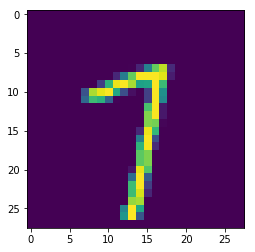

In [5]:
# 23
from matplotlib import pyplot
pyplot.imshow(xtrain[42, 0, :, :])
print('The lable is: '+ str(ltrain[42]))

In [6]:
# 24
xtrain = torch.from_numpy(xtrain)
ltrain = torch.from_numpy(ltrain)

xtest = torch.from_numpy(xtest)
ltest = torch.from_numpy(ltest)

In [ ]:
# 25

![WechatIMG243.jpeg](attachment:WechatIMG243.jpeg)
![WechatIMG244.jpeg](attachment:WechatIMG244.jpeg)

In [7]:
# 26
import torch.nn as nn       # This is for importing the baseline class from torch.nn
import torch.nn.functional as F       # This is importing necessary functions using in construct neural network
# This is our neural networks class that inherits from nn.Module
class LeNet(nn.Module): 
# Here we define our network structure
    def __init__(self):
        super(LeNet, self).__init__()       # This is to inherit attributes and behaviors from nn class without needing to implement them again.
        self.conv1 = nn.Conv2d(1, 6, 5)       # The first convolution layer
        self.conv2 = nn.Conv2d(6, 16, 5)       # The second convolution layer
        self.fc1 = nn.Linear(256, 120)       # The first fully-connected layer
        self.fc2 = nn.Linear(120, 84)       # The second fully-connected layer
        self.fc3 = nn.Linear(84, 10)       # The third fully-connected layer
    # Here we define one forward pass through the network
    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))       # After 1st convolution, process the data via ReLu and then max pooling
        x = F.max_pool2d(F.relu(self.conv2(x)), (2, 2))       # After 2nd convolution, process the data via ReLu and then max pooling
        x = x.view(-1, self.num_flat_features(x))       # Flatten the data to 2D
        x = F.relu(self.fc1(x))       # After 1st fully-connected layer, process the data via ReLu
        x = F.relu(self.fc2(x))       # After 2nd fully-connected layer, process the data via ReLu
        x = self.fc3(x)       # Process data via 3rd fully-connected layer
        return x
    # Determine the number of features in a batch of tensors
    def num_flat_features(self, x ):
        size = x.size()[1:]       # Get the 2nd, 3rd, and 4th dimension of input tensor
        return np.prod(size)       # Product the 2nd, 3rd, 4th dimensions
net = LeNet()       # Assign net with the class LeNet
print(net)       # Print the architecture of the network

LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=256, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [13]:
# 27
for name, param in net.named_parameters():
    print(name, param.size(), param.requires_grad)

conv1.weight torch.Size([6, 1, 5, 5]) True
conv1.bias torch.Size([6]) True
conv2.weight torch.Size([16, 6, 5, 5]) True
conv2.bias torch.Size([16]) True
fc1.weight torch.Size([120, 256]) True
fc1.bias torch.Size([120]) True
fc2.weight torch.Size([84, 120]) True
fc2.bias torch.Size([84]) True
fc3.weight torch.Size([10, 84]) True
fc3.bias torch.Size([10]) True


The learnable parameters are: conv1.weight, conv1.bias, conv2.weight, conv2.bias, fc1.weight, fc1.bias, fc2.weight, fc2.bias, fc3.weight, fc3.bias.

Gradients are going to be tracked by autograd for all above parameters since their requires_grad are True.

In [37]:
# 28
with torch.no_grad():
    yinit = net(xtest)
_, lpred = yinit.max(1)
print(100 * (ltest == lpred).float().mean())

tensor(12.7500)


The result means that the initialized network (without training) can reach an accuracy of 12.75% on test set

In [49]:
# 29
def backprop_deep(xtrain, ltrain, net, T, B=100, gamma=.001, rho=.9):
    N = xtrain.size()[0] # Training set size
    NB = N/B # Number of minibatches
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(net.parameters(), lr=gamma, momentum=rho)
    

torch.Size([60000])


In [30]:
# 30
def backprop_deep(xtrain, ltrain, net, T, B=100, gamma=.001, rho=.9):
    N = xtrain.size()[0] # Training set size
    NB = int((N+B-1)/B) # Number of minibatches
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(net.parameters(), lr=gamma, momentum=rho)
    
    for epoch in range(T):
        running_loss = 0.0
        shuffled_indices = np.random.permutation(range(N))
        for k in range(NB):
            # Extract k-th minibatch from xtrain and ltrain
            minibatch_indices = shuffled_indices[B*k:min(B*(k+1), N)]
            inputs = xtrain[minibatch_indices, :, :, :]
            labels = ltrain[minibatch_indices]
            
            # Initialize the gradients to zero
            optimizer.zero_grad()
            
            # Forward propagation
            outputs = net(inputs)
            
            # Error evaluation
            loss = criterion(outputs, labels)
            
            # Back propagation
            loss.backward()
            
            # Parameter update
            optimizer.step()
            
            # Print averaged loss per minibatch every 100 mini-batches
            # Compute and print statistics
            with torch.no_grad():
                running_loss += loss.item()
            if k % 100 == 99:
                print('[%d, %5d] loss: %.3f' %
                        (epoch + 1, k + 1, running_loss / 100))
                running_loss = 0.0

def weight_reset(m):     # reset net weight
    if isinstance(m, nn.Conv2d) or isinstance(m, nn.Linear):
        m.reset_parameters()
        
net = LeNet()
backprop_deep(xtrain, ltrain, net, T=3)

[1,   100] loss: 2.300
[1,   200] loss: 2.283
[1,   300] loss: 2.257
[1,   400] loss: 2.193
[1,   500] loss: 1.987
[1,   600] loss: 1.519
[2,   100] loss: 0.939
[2,   200] loss: 0.613
[2,   300] loss: 0.433
[2,   400] loss: 0.374
[2,   500] loss: 0.322
[2,   600] loss: 0.278
[3,   100] loss: 0.259
[3,   200] loss: 0.238
[3,   300] loss: 0.221
[3,   400] loss: 0.217
[3,   500] loss: 0.204
[3,   600] loss: 0.187


In [32]:
# 31
ypred = net(xtest)
_, lpred = ypred.max(1)
print(100 * (ltest == lpred).float().mean())

tensor(94.6300)


The accuracy improved from 12.75% to 94.63%. The accuracy increases 81.88%.

In [33]:
# 32
device = 'cuda' if torch.cuda.is_available() else 'cpu' 
xtrain = xtrain.to(device)
ltrain = ltrain.to(device)
xtest = xtest.to(device)
ltest = ltest.to(device)

net.apply(weight_reset)
net = LeNet().to(device)

backprop_deep(xtrain, ltrain, net, T=10)

[1,   100] loss: 2.297
[1,   200] loss: 2.282
[1,   300] loss: 2.257
[1,   400] loss: 2.199
[1,   500] loss: 1.987
[1,   600] loss: 1.314
[2,   100] loss: 0.689
[2,   200] loss: 0.517
[2,   300] loss: 0.446
[2,   400] loss: 0.394
[2,   500] loss: 0.353
[2,   600] loss: 0.301
[3,   100] loss: 0.280
[3,   200] loss: 0.264
[3,   300] loss: 0.237
[3,   400] loss: 0.236
[3,   500] loss: 0.223
[3,   600] loss: 0.209
[4,   100] loss: 0.195
[4,   200] loss: 0.184
[4,   300] loss: 0.171
[4,   400] loss: 0.169
[4,   500] loss: 0.161
[4,   600] loss: 0.156
[5,   100] loss: 0.144
[5,   200] loss: 0.150
[5,   300] loss: 0.131
[5,   400] loss: 0.132
[5,   500] loss: 0.133
[5,   600] loss: 0.127
[6,   100] loss: 0.128
[6,   200] loss: 0.119
[6,   300] loss: 0.122
[6,   400] loss: 0.109
[6,   500] loss: 0.112
[6,   600] loss: 0.109
[7,   100] loss: 0.109
[7,   200] loss: 0.097
[7,   300] loss: 0.105
[7,   400] loss: 0.105
[7,   500] loss: 0.100
[7,   600] loss: 0.094
[8,   100] loss: 0.093
[8,   200] 

In [34]:
# 33
ypred = net(xtest)
_, lpred = ypred.max(1)
print(100 * (ltest == lpred).float().mean())

tensor(97.9000, device='cuda:0')


It improve from 94.63% to 97.90%. The accuracy increases 3.27%.